# ***Linear Regression with NN - PyTorch***

## *Creating a sample dataset for the experiment*

In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt

torch.__version__

'2.1.0+cu121'

In [2]:
weight, bias = 0.7, 0.3 # weights and bias to create the sample dataset

# Create data
step = 0.02
X = torch.arange(0, 2, 0.02).unsqueeze(dim=1)
y = weight * X + bias

X = X + (torch.randn_like(X) * 0.02) # adding a randow noise to the data
y = y + (torch.randn_like(y) * 0.02)

print("X of dataset:\n", X[:5], X.shape)
print("Y of dataset:\n", y[:5], y.shape)

X of dataset:
 tensor([[-0.0155],
        [-0.0187],
        [ 0.0296],
        [ 0.0486],
        [ 0.0609]]) torch.Size([100, 1])
Y of dataset:
 tensor([[0.2906],
        [0.3094],
        [0.3480],
        [0.3249],
        [0.3252]]) torch.Size([100, 1])


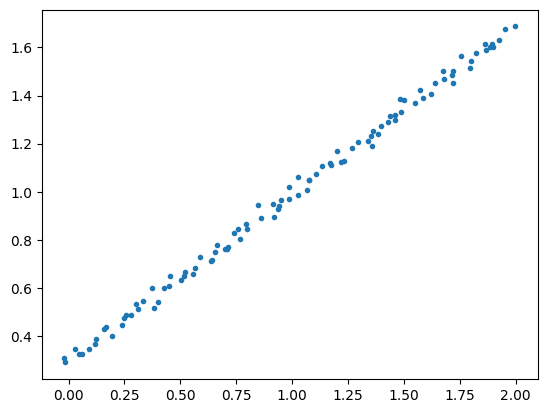

In [3]:
plt.scatter(X, y, marker='.')  # 'o' for markers
plt.show()

## *Spliting the dataset into train and test with a ration*

In [4]:
train_split = int(0.8 * len(X)) # 80% of data used for training set, 20% for testing
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(80, 80, 20, 20)

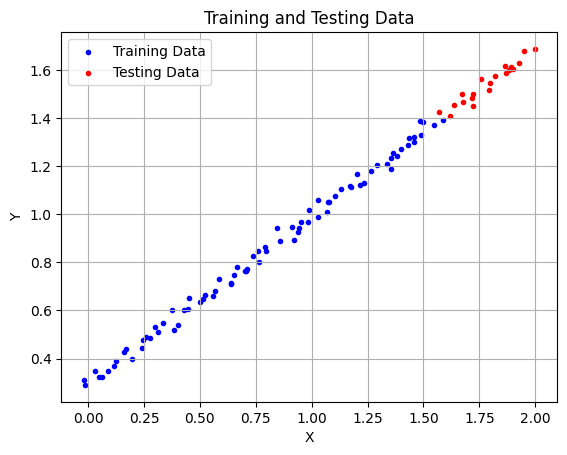

In [5]:
plt.scatter(X_train, y_train, color='blue', label='Training Data', marker=".")
plt.scatter(X_test, y_test, color='red', label='Testing Data', marker=".")
plt.title('Training and Testing Data')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid(True)
plt.show()

## *Define the neural netwrok*

**torch.nn.Module** is designed to be subclassed to define custom neural network architectures. When you define a new neural network module in PyTorch, you typically inherit from **torch.nn.Module**.

We set `requires_grad=True` because we want to compute gradients of the weights and bias during the training process, which is essential for running the gradient descent algorithm.

* `nn.Module` contains the larger building blocks (layers)
* `nn.Parameter` contains the smaller parameters like weights and biases (put these together to make `nn.Module`(s))
* `forward()` tells the larger blocks how to make calculations on inputs (tensors full of data) within  `nn.Module`(s)
* `torch.optim` contains optimization methods on how to improve the parameters within `nn.Parameter` to better represent input data

In [6]:
class LinearRegressionModel(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.weights = torch.nn.Parameter(torch.randn(1, dtype=torch.float), requires_grad=True)
        self.bias = torch.nn.Parameter(torch.randn(1, dtype=torch.float), requires_grad=True)

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.weights * x + self.bias

* `torch.nn` : Contains all of the building blocks for computational graphs
* `torch.nn.Module` : The base class of the all the NN, all the building blocks for NN are contains here. If we want to NN, then we should subclass `nn.Module`.
* This contains various kind of optimization algorithms.


## *Create an instance of the model*

In [7]:
model_linear = LinearRegressionModel()

In [8]:
print(list(model_linear.parameters()), "\n")
print(model_linear.state_dict(), "\n")
print(model_linear.weights, "\n")

[Parameter containing:
tensor([0.8341], requires_grad=True), Parameter containing:
tensor([0.5962], requires_grad=True)] 

OrderedDict([('weights', tensor([0.8341])), ('bias', tensor([0.5962]))]) 

Parameter containing:
tensor([0.8341], requires_grad=True) 



## *Making predictions with the model before the training process*

In [9]:
with torch.inference_mode(): # inference_mode, tured off the gradient traking
    y_preds = model_linear(X_test)
y_preds.T

tensor([[1.9066, 1.9474, 1.9619, 1.9920, 1.9955, 2.0308, 2.0272, 2.0307, 2.0933,
         2.0604, 2.0971, 2.1147, 2.1544, 2.1510, 2.1673, 2.1805, 2.1745, 2.2025,
         2.2239, 2.2628]])

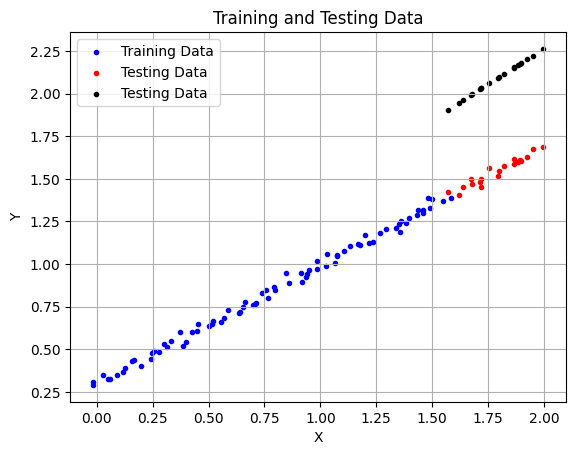

In [10]:
plt.scatter(X_train, y_train, color='blue', label='Training Data', marker=".")
plt.scatter(X_test, y_test, color='red', label='Testing Data', marker=".")
plt.scatter(X_test, y_preds, color='black', label='Testing Data', marker=".")
plt.title('Training and Testing Data')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid(True)
plt.show()

## *Fit the model to the training dataset - Training the model*

***Define the error function - MSE (Mean square Error) & Optimizer***

In [11]:
loss_func = torch.nn.MSELoss() # Meas Square Error Loss function
optimizer = torch.optim.SGD(model_linear.parameters(), lr=0.01) # stochastic gradient descent (SGD) optimization algorithm

#In stochastic gradient descent, only one training example is used to compute the gradient of the loss function with respect to the model parameters in each iteration.

***Training loop of the model***

In [12]:
epochs = 3000 # number of times, the model will pass over the training data

train_loss_values = []
test_loss_values = []
epoch_count = []

for epoch in range(epochs):
    model_linear.train()

    y_pred = model_linear(X_train) # forward propagation
    loss = loss_func(y_pred, y_train) # loss calculations
    optimizer.zero_grad() # gradient resets to zero in each epoch
    loss.backward() # backward propagation (move backward through the network to calculate the gradient of each parameters with respect to the loss)
    optimizer.step() # update paramterrs to reduce the loss

    model_linear.eval()
    with torch.no_grad():
        test_pred = model_linear(X_test)
        test_loss = loss_func(test_pred, y_test.type(torch.float))

        if epoch % 100 == 0:
            epoch_count.append(epoch)
            train_loss_values.append(loss.detach().numpy())
            test_loss_values.append(test_loss.detach().numpy())
            print(f"Epoch: {epoch} | MAE Train Loss: {loss} | MAE Test Loss: {test_loss} ")


Epoch: 0 | MAE Train Loss: 0.17111611366271973 | MAE Test Loss: 0.27446359395980835 
Epoch: 100 | MAE Train Loss: 0.0014197006821632385 | MAE Test Loss: 0.001639417139813304 
Epoch: 200 | MAE Train Loss: 0.0009787080343812704 | MAE Test Loss: 0.002121733035892248 
Epoch: 300 | MAE Train Loss: 0.0008070741896517575 | MAE Test Loss: 0.0015306058339774609 
Epoch: 400 | MAE Train Loss: 0.0007030331762507558 | MAE Test Loss: 0.0011406221892684698 
Epoch: 500 | MAE Train Loss: 0.0006399090634658933 | MAE Test Loss: 0.0008989672060124576 
Epoch: 600 | MAE Train Loss: 0.0006016101106069982 | MAE Test Loss: 0.0007489110575988889 
Epoch: 700 | MAE Train Loss: 0.0005783744854852557 | MAE Test Loss: 0.000655205047223717 
Epoch: 800 | MAE Train Loss: 0.0005642766482196748 | MAE Test Loss: 0.0005962767172604799 
Epoch: 900 | MAE Train Loss: 0.0005557233234867454 | MAE Test Loss: 0.0005588990752585232 
Epoch: 1000 | MAE Train Loss: 0.000550533935893327 | MAE Test Loss: 0.0005349609418772161 
Epoch: 1

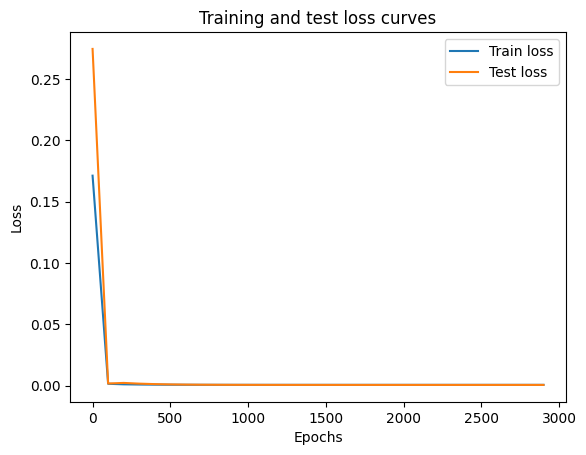

In [13]:
plt.plot(epoch_count, train_loss_values, label="Train loss")
plt.plot(epoch_count, test_loss_values, label="Test loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend();

***Make predictions with the trained model***

In [14]:
with torch.inference_mode(): # inference_mode, tured off the gradient traking
    y_preds = model_linear(X_test)
y_preds.T

tensor([[1.3905, 1.4245, 1.4366, 1.4617, 1.4646, 1.4941, 1.4911, 1.4940, 1.5462,
         1.5187, 1.5494, 1.5641, 1.5972, 1.5944, 1.6079, 1.6189, 1.6140, 1.6373,
         1.6551, 1.6876]])

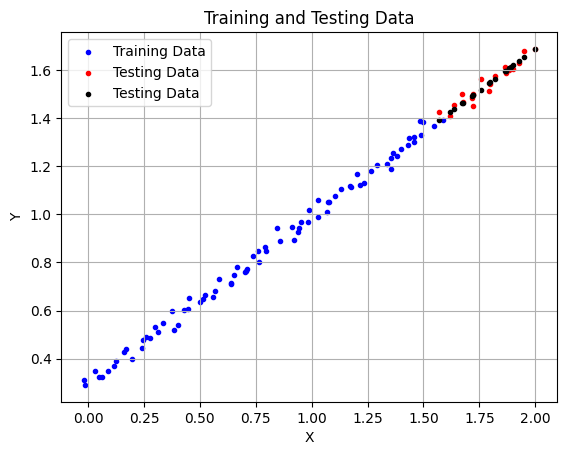

In [15]:
plt.scatter(X_train, y_train, color='blue', label='Training Data', marker=".")
plt.scatter(X_test, y_test, color='red', label='Testing Data', marker=".")
plt.scatter(X_test, y_preds, color='black', label='Testing Data', marker=".")
plt.title('Training and Testing Data')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid(True)
plt.show()

***Weights and bias of the model after the training process***

In [16]:
print(list(model_linear.parameters()), "\n")
print(model_linear.state_dict(), "\n")
print(model_linear.weights, "\n")

[Parameter containing:
tensor([0.6956], requires_grad=True), Parameter containing:
tensor([0.2976], requires_grad=True)] 

OrderedDict([('weights', tensor([0.6956])), ('bias', tensor([0.2976]))]) 

Parameter containing:
tensor([0.6956], requires_grad=True) 



## **Rebuild using PyTorch `nn.Linear()` function & Training on the GPU**
In this way, we do not have to define each paramters(weights and bias) seperatly.


In [17]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

Using device: cuda


***Define the model***

In [18]:
class LinearRegressionModel_V2(torch.nn.Module):
    def __init__(self):
        super().__init__()
        # Use nn.Linear() for creating the model parameters
        self.linear_layer = torch.nn.Linear(in_features=1,
                                      out_features=1)

    # Define the forward computation (input data x flows through nn.Linear())
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.linear_layer(x)

***Create the model and store it on the GPU***

In [22]:
model_linear_v2 = LinearRegressionModel_V2()
model_linear_v2.to(device)
next(model_linear_v2.parameters()).device

device(type='cuda', index=0)

***Define the error function - MSE (Mean square Error) & Optimizer***

In [23]:
loss_func_v2 = torch.nn.L1Loss() # Meas Square Error Loss function
optimizer_v2 = torch.optim.Adam(model_linear_v2.parameters(), lr=0.01) # Adam optimization algorithm

***Training the dataset***

In [25]:
epochs = 3000 # number of times, the model will pass over the training data

train_loss_values = []
test_loss_values = []
epoch_count = []

#pass datasets to the GPU
X_train = X_train.to(device)
X_test = X_test.to(device)
y_train = y_train.to(device)
y_test = y_test.to(device)

for epoch in range(epochs):
    model_linear_v2.train()

    y_pred = model_linear_v2(X_train) # forward propagation
    loss = loss_func_v2(y_pred, y_train) # loss calculations
    optimizer_v2.zero_grad() # gradient resets to zero in each epoch
    loss.backward() # backward propagation (move backward through the network to calculate the gradient of each parameters with respect to the loss)
    optimizer_v2.step() # update paramterrs to reduce the loss

    model_linear.eval()
    with torch.no_grad():
        test_pred = model_linear_v2(X_test)
        test_loss = loss_func_v2(test_pred, y_test.type(torch.float))

        if epoch % 100 == 0:
            epoch_count.append(epoch)
            train_loss_values.append(loss.cpu().detach().numpy())
            test_loss_values.append(test_loss.cpu().detach().numpy())
            print(f"Epoch: {epoch} | MAE Train Loss: {loss} | MAE Test Loss: {test_loss} ")


Epoch: 0 | MAE Train Loss: 1.5754281282424927 | MAE Test Loss: 2.747736692428589 
Epoch: 100 | MAE Train Loss: 0.10727228969335556 | MAE Test Loss: 0.17486202716827393 
Epoch: 200 | MAE Train Loss: 0.01873808167874813 | MAE Test Loss: 0.017570538446307182 
Epoch: 300 | MAE Train Loss: 0.018568720668554306 | MAE Test Loss: 0.01758820377290249 
Epoch: 400 | MAE Train Loss: 0.01856875978410244 | MAE Test Loss: 0.017586637288331985 
Epoch: 500 | MAE Train Loss: 0.01856849528849125 | MAE Test Loss: 0.017596429213881493 
Epoch: 600 | MAE Train Loss: 0.01856965385377407 | MAE Test Loss: 0.017560232430696487 
Epoch: 700 | MAE Train Loss: 0.018569231033325195 | MAE Test Loss: 0.017587512731552124 
Epoch: 800 | MAE Train Loss: 0.01856929622590542 | MAE Test Loss: 0.017551172524690628 
Epoch: 900 | MAE Train Loss: 0.018570246174931526 | MAE Test Loss: 0.01759536936879158 
Epoch: 1000 | MAE Train Loss: 0.018574703484773636 | MAE Test Loss: 0.017493272200226784 
Epoch: 1100 | MAE Train Loss: 0.0185

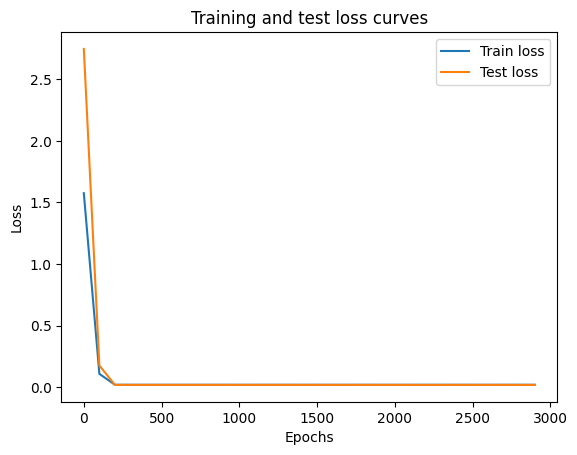

In [26]:
plt.plot(epoch_count, train_loss_values, label="Train loss")
plt.plot(epoch_count, test_loss_values, label="Test loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend();

***Make predictions with new model***

In [27]:
with torch.inference_mode(): # inference_mode, tured off the gradient traking
    y_preds = model_linear_v2(X_test)
y_preds.T

tensor([[1.3876, 1.4216, 1.4337, 1.4588, 1.4617, 1.4911, 1.4881, 1.4910, 1.5432,
         1.5158, 1.5464, 1.5611, 1.5942, 1.5913, 1.6049, 1.6159, 1.6109, 1.6343,
         1.6520, 1.6845]], device='cuda:0')

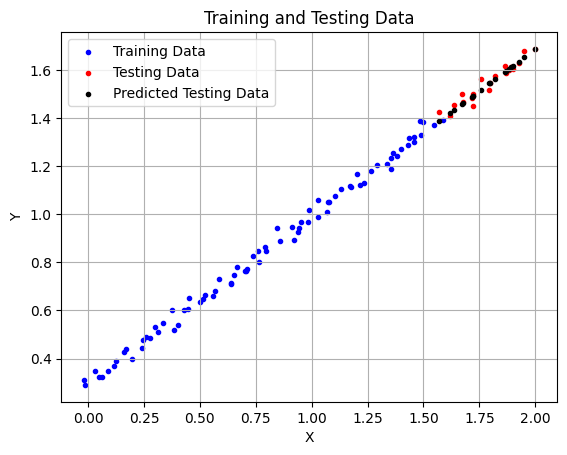

In [29]:
# Move tensors to CPU and convert to NumPy arrays
X_train_cpu = X_train.cpu().detach().numpy()
y_train_cpu = y_train.cpu().detach().numpy()
X_test_cpu = X_test.cpu().detach().numpy()
y_test_cpu = y_test.cpu().detach().numpy()
y_preds_cpu = y_preds.cpu().detach().numpy()

# Plotting
plt.scatter(X_train_cpu, y_train_cpu, color='blue', label='Training Data', marker=".")
plt.scatter(X_test_cpu, y_test_cpu, color='red', label='Testing Data', marker=".")
plt.scatter(X_test_cpu, y_preds_cpu, color='black', label='Predicted Testing Data', marker=".")
plt.title('Training and Testing Data')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid(True)
plt.show()
